In [15]:
import re

from xcube_cmems.store import CmemsDataStore

In [4]:
cmems_store =  CmemsDataStore()

Get all the data ids in cmems datastore

In [9]:
all_data_ids = list(cmems_store.get_data_ids())
len(all_data_ids)

1195

In [21]:
[d for d in all_data_ids if re.search("glo.*bgc.*my.*l4.*1d", d, flags=re.IGNORECASE)]

['cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D',
 'cmems_obs-oc_glo_bgc-plankton_my_l4-multi-climatology-4km_P1D',
 'cmems_obs-oc_glo_bgc-transp_my_l4-gapfree-multi-4km_P1D']

In [24]:
[d for d in all_data_ids if re.search("chl", d, flags=re.IGNORECASE)]

['cmems_obs-ins_glo_bgc-chl_my_na_irr',
 'cmems_obs-mob_glo_bgc-chl-poc_my_0.25deg-climatology_P1M-m',
 'cmems_obs-mob_glo_bgc-chl-poc_my_0.25deg_P7D-m',
 'cmems_mod_nws_bgc-chl_my_7km-3D_P1D-m',
 'cmems_mod_nws_bgc-chl_my_7km-3D_P1M-m',
 'cmems_mod_nws_bgc-chl_myint_7km-3D_P1M-m',
 'cmems_obs_oc_bal_bgc_tur-spm-chl_nrt_l3-hr-mosaic_P1D-m',
 'cmems_obs_oc_bal_bgc_tur-spm-chl_nrt_l4-hr-mosaic_P1D-m',
 'cmems_obs_oc_blk_bgc_tur-spm-chl_nrt_l3-hr-mosaic_P1D-m',
 'cmems_obs_oc_blk_bgc_tur-spm-chl_nrt_l4-hr-mosaic_P1D-m',
 'cmems_obs_oc_ibi_bgc_tur-spm-chl_nrt_l3-hr-mosaic_P1D-m',
 'cmems_obs_oc_ibi_bgc_tur-spm-chl_nrt_l4-hr-mosaic_P1D-m',
 'cmems_obs_oc_med_bgc_tur-spm-chl_nrt_l3-hr-mosaic_P1D-m',
 'cmems_obs_oc_med_bgc_tur-spm-chl_nrt_l4-hr-mosaic_P1D-m',
 'cmems_obs_oc_nws_bgc_tur-spm-chl_nrt_l3-hr-mosaic_P1D-m',
 'cmems_obs_oc_nws_bgc_tur-spm-chl_nrt_l4-hr-mosaic_P1D-m',
 'omi_health_chl_arctic_oceancolour_area_averaged_mean',
 'omi_health_chl_atlantic_oceancolour_area_averaged_mean',
 

In [32]:
# data_id = "cmems_obs-oc_glo_bgc-transp_my_l4-gapfree-multi-4km_P1D"  # No CHL
# data_id = "cmems_obs-ins_glo_bgc-chl_my_na_irr"  # broken
# data_id = "cmems_obs-mob_glo_bgc-chl-poc_my_0.25deg_P7D-m"  # "will be retired on the 2025-11-25T13:00:00.000Z"
# data_id = "omi_health_chl_global_oceancolour_trend"  # broken
data_id = "cmems_mod_nws_bgc-chl_my_7km-3D_P1D-m"  # Only up to 13°E

In [33]:
cmems_store.describe_data(data_id)

INFO - 2025-11-20T16:48:18Z - Selected dataset version: "202012"
INFO - 2025-11-20T16:48:18Z - Selected dataset part: "default"
/home/pont/miniforge3/envs/geo-aquawatch/lib/python3.13/site-packages/xcube/core/store/descriptor.py:247: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  self.dims = dict(dims) if dims else None


In [34]:
ds = cmems_store.open_data(data_id)
ds

INFO - 2025-11-20T16:49:42Z - Selected dataset version: "202012"
INFO - 2025-11-20T16:49:42Z - Selected dataset part: "default"


<xarray.Dataset> Size: 128GB
Dimensions:    (depth: 24, latitude: 375, longitude: 297, time: 11961)
Coordinates:
  * depth      (depth) float32 96B 0.0 3.0 10.0 15.0 ... 2e+03 3e+03 4e+03 5e+03
  * latitude   (latitude) float32 2kB 40.07 40.13 40.2 ... 64.87 64.93 65.0
  * longitude  (longitude) float32 1kB -19.89 -19.78 -19.67 ... 12.78 12.89 13.0
  * time       (time) datetime64[ns] 96kB 1993-01-01 1993-01-02 ... 2025-09-30
Data variables:
    chl        (time, depth, latitude, longitude) float32 128GB dask.array<chunksize=(200, 4, 375, 297), meta=np.ndarray>
Attributes:
    title:        daily-mean chlorophyll concentration (3D)
    references:   http://marine.copernicus.eu/
    Conventions:  CF-1.7
    history:      See source and creation_date attributes
    credit:       E.U. Copernicus Marine Service Information (CMEMS)
    institution:  UK Met Office
    contact:      servicedesk.cmems@mercator-ocean.eu
    source:       AMM-FOAM 7 km (tidal) NEMO v3.6_FABM-ERSEM v15.06_NEMOVAR v6

In [65]:
ds.depth

<xarray.DataArray 'depth' (depth: 24)> Size: 96B
array([0.00e+00, 3.00e+00, 1.00e+01, 1.50e+01, 2.00e+01, 3.00e+01, 5.00e+01,
       7.50e+01, 1.00e+02, 1.25e+02, 1.50e+02, 2.00e+02, 2.50e+02, 3.00e+02,
       4.00e+02, 5.00e+02, 6.00e+02, 7.50e+02, 1.00e+03, 1.50e+03, 2.00e+03,
       3.00e+03, 4.00e+03, 5.00e+03], dtype=float32)
Coordinates:
  * depth    (depth) float32 96B 0.0 3.0 10.0 15.0 ... 2e+03 3e+03 4e+03 5e+03
Attributes:
    positive:       down
    long_name:      Depth
    axis:           Z
    units:          m
    standard_name:  depth

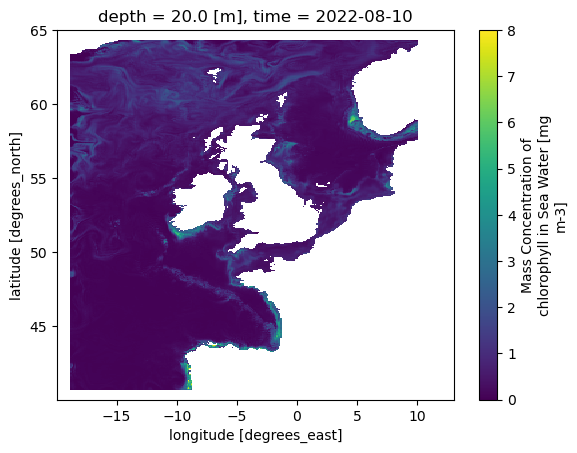

In [67]:
ds.sel(time="2022-08-10", depth=20, method="nearest").chl.plot.imshow(vmax=8)

In [39]:
data_id_2 = "cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D"
cmems_store.describe_data(data_id_2)

INFO - 2025-11-20T17:01:58Z - Selected dataset version: "202311"
INFO - 2025-11-20T17:01:58Z - Selected dataset part: "default"
/home/pont/miniforge3/envs/geo-aquawatch/lib/python3.13/site-packages/xcube/core/store/descriptor.py:247: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  self.dims = dict(dims) if dims else None


In [40]:
ds2 = cmems_store.open_data(data_id_2)

INFO - 2025-11-20T17:09:19Z - Selected dataset version: "202311"
INFO - 2025-11-20T17:09:19Z - Selected dataset part: "default"


In [41]:
ds2

<xarray.Dataset> Size: 5TB
Dimensions:          (time: 10297, latitude: 4320, longitude: 8640)
Coordinates:
  * time             (time) datetime64[ns] 82kB 1997-09-04 ... 2025-11-12
  * latitude         (latitude) float32 17kB -89.98 -89.94 -89.9 ... 89.94 89.98
  * longitude        (longitude) float32 35kB -180.0 -179.9 ... 179.9 180.0
Data variables:
    CHL              (time, latitude, longitude) float32 2TB dask.array<chunksize=(50, 1024, 1024), meta=np.ndarray>
    CHL_uncertainty  (time, latitude, longitude) float64 3TB dask.array<chunksize=(50, 1024, 1024), meta=np.ndarray>
    flags            (time, latitude, longitude) int8 384GB dask.array<chunksize=(50, 1024, 1024), meta=np.ndarray>
Attributes:
    title:        cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D
    references:   http://www.globcolour.info GlobColour has been originally f...
    Conventions:  CF-1.8, ACDD-1.3
    history:      Created using software developed at ACRI-ST
    comment:      average
    institution:  ACRI
    contact:      servicedesk.cmems@acri-st.fr
    source:       surface observation

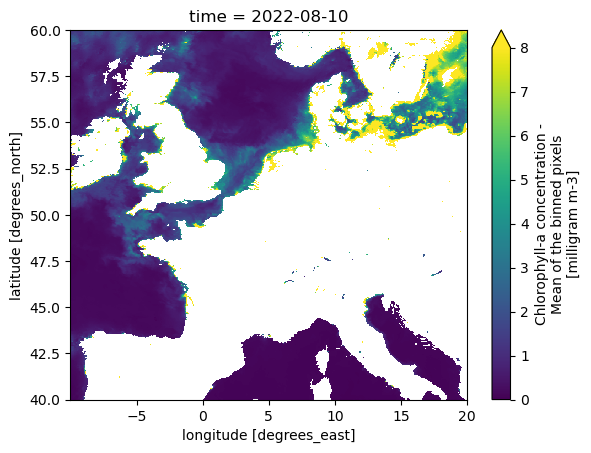

In [58]:
ds2.CHL.sel(time="2022-08-10", method="nearest").\
    sel(longitude=slice(-10, 20), latitude=slice(40, 60)).\
    plot.imshow(vmin=0, vmax=8)

In [48]:
[d for d in all_data_ids if re.search("glo.*sst", d, flags=re.IGNORECASE)]

['cmems_mod_glo_phy_anfc_0.083deg-sst-anomaly_P1D-m',
 'cmems_mod_glo_phy_anfc_0.083deg-sst-anomaly_P1M-m',
 'global_omi_climate-variability_nino34_sst_anom',
 'global_omi_tempsal_sst_area_averaged_anomalies',
 'global_omi_tempsal_sst_trend',
 'IFREMER-GLOB-SST-L3-NRT-OBS_FULL_TIME_SERIE',
 'METOFFICE-GLO-SST-L4-NRT-OBS-SST-V2',
 'METOFFICE-GLO-SST-L4-REP-OBS-SST',
 'C3S-GLO-SST-L4-REP-OBS-SST',
 'ESACCI-GLO-SST-L4-REP-OBS-SST']

In [49]:
data_id_3 = "METOFFICE-GLO-SST-L4-REP-OBS-SST"
cmems_store.describe_data(data_id_3)

INFO - 2025-11-20T17:20:04Z - Selected dataset version: "202003"
INFO - 2025-11-20T17:20:04Z - Selected dataset part: "default"
/home/pont/miniforge3/envs/geo-aquawatch/lib/python3.13/site-packages/xcube/core/store/descriptor.py:247: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  self.dims = dict(dims) if dims else None


In [51]:
ds3 = cmems_store.open_data(data_id_3)
ds3

INFO - 2025-11-20T17:21:47Z - Selected dataset version: "202003"
INFO - 2025-11-20T17:21:47Z - Selected dataset part: "default"


<xarray.Dataset> Size: 11TB
Dimensions:           (time: 14853, latitude: 3600, longitude: 7200)
Coordinates:
  * time              (time) datetime64[ns] 119kB 1981-10-01 ... 2022-05-31
  * latitude          (latitude) float32 14kB -89.97 -89.93 ... 89.93 89.97
  * longitude         (longitude) float32 29kB -180.0 -179.9 ... 179.9 180.0
Data variables:
    analysed_sst      (time, latitude, longitude) float64 3TB dask.array<chunksize=(50, 1024, 2048), meta=np.ndarray>
    analysis_error    (time, latitude, longitude) float64 3TB dask.array<chunksize=(50, 1024, 2048), meta=np.ndarray>
    mask              (time, latitude, longitude) float32 2TB dask.array<chunksize=(50, 1024, 2048), meta=np.ndarray>
    sea_ice_fraction  (time, latitude, longitude) float64 3TB dask.array<chunksize=(50, 1024, 2048), meta=np.ndarray>
Attributes:
    title:        Global SST & Sea Ice Analysis, L4 OSTIA, 0.05 deg daily (ME...
    references:   Donlon, C.J., Martin, M., Stark, J.D., Roberts-Jones, J., F...
    Conventions:  CF-1.4, ACDD-1.3
    history:      Created from sst.nc; obs_anal.nc; seaice.nc
    comment:      WARNING Some applications are unable to properly handle sig...
    institution:  UKMO
    source:       AMSR2-REMSS-L2P-v2.0, AMSRE-REMSS-L2P-v2.0, GOES<13,16>-OSI...

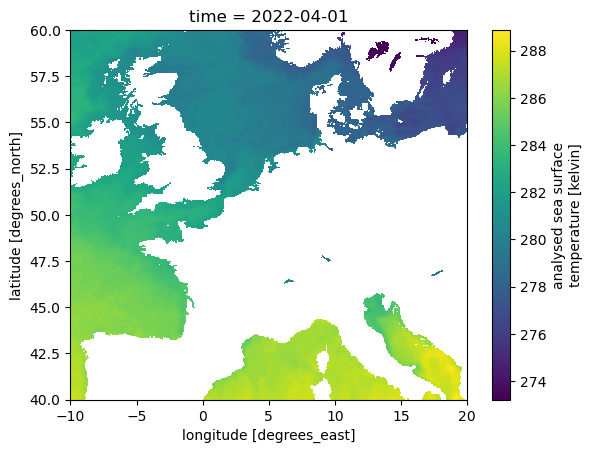

In [52]:
ds3.analysed_sst.sel(time="2022-04-01", method="nearest").\
    sel(longitude=slice(-10, 20), latitude=slice(40, 60)).\
    plot.imshow()    

In [54]:
data_id_4 = "C3S-GLO-SST-L4-REP-OBS-SST"
cmems_store.describe_data(data_id_4)

INFO - 2025-11-21T14:54:00Z - Selected dataset version: "202506"
INFO - 2025-11-21T14:54:00Z - Selected dataset part: "default"
/home/pont/miniforge3/envs/geo-aquawatch/lib/python3.13/site-packages/xcube/core/store/descriptor.py:247: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  self.dims = dict(dims) if dims else None


In [55]:
ds4 = cmems_store.open_data(data_id_4)
ds4

INFO - 2025-11-21T14:54:03Z - Selected dataset version: "202506"
INFO - 2025-11-21T14:54:03Z - Selected dataset part: "default"


<xarray.Dataset> Size: 20TB
Dimensions:                (time: 15706, latitude: 3600, longitude: 7200)
Coordinates:
  * time                   (time) datetime64[ns] 126kB 1982-01-01 ... 2024-12-31
  * latitude               (latitude) float32 14kB -89.97 -89.92 ... 89.93 89.98
  * longitude              (longitude) float32 29kB -180.0 -179.9 ... 180.0
Data variables:
    analysed_sst           (time, latitude, longitude) float64 3TB dask.array<chunksize=(2112, 800, 64), meta=np.ndarray>
    analysed_st            (time, latitude, longitude) float64 3TB dask.array<chunksize=(2112, 800, 64), meta=np.ndarray>
    analysis_error_sst     (time, latitude, longitude) float64 3TB dask.array<chunksize=(2112, 800, 64), meta=np.ndarray>
    analysis_error_st      (time, latitude, longitude) float64 3TB dask.array<chunksize=(2112, 800, 64), meta=np.ndarray>
    mask                   (time, latitude, longitude) float32 2TB dask.array<chunksize=(2112, 800, 64), meta=np.ndarray>
    sea_ice_fraction       (time, latitude, longitude) float64 3TB dask.array<chunksize=(2112, 800, 64), meta=np.ndarray>
    sea_ice_fraction_flag  (time, latitude, longitude) float32 2TB dask.array<chunksize=(2112, 800, 64), meta=np.ndarray>
Attributes:
    title:        Global Sea and Ice Surface Temperature, L4, 5km daily repro...
    references:   Høyer, J. L. and She, J., Optimal interpolation of sea surf...
    Conventions:  CF-1.4, Unidata Observation Dataset v1.0
    history:      Version 1.0
    comment:      IN NO EVENT SHALL DMI OR ITS REPRESENTATIVES BE LIABLE FOR ...
    institution:  Danish Meteorological Institute, DMI
    source:       ESA SST CCI v3.0 and C3S v3.0 L3U, AASTIv2 IST L2P. OSI-SAF...

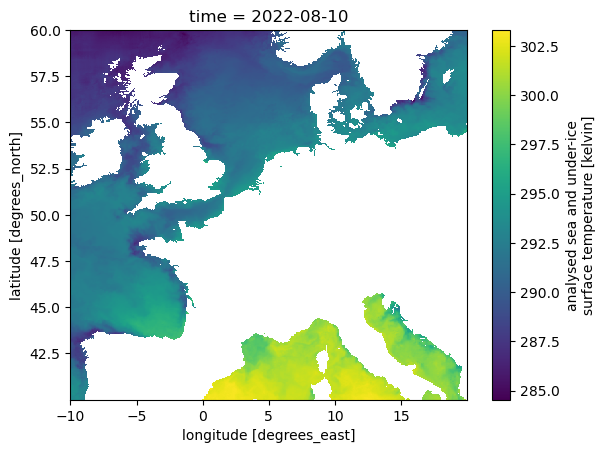

In [56]:
ds4.analysed_sst.sel(time="2022-08-10", method="nearest").\
    sel(longitude=slice(-10, 20), latitude=slice(40, 60)).\
    plot.imshow()